## Importing Libraries 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
df.rename(columns = {" HIV/AIDS":"AIDS","under-five deaths":"under_5deaths","Total expenditure":"Expenditure",
                     "thinness  1-19 years":"thinness1-19","thinness 5-9 years":"thinness5-9",
                     "Income composition of resources":"income_composition","percentage expenditure":"percentage_expenditure",
                    "Adult Mortality":"mortality","infant deaths":"infant_deaths"},inplace=True)

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under_5deaths', 'Polio', 'Expenditure', 'Diphtheria',
       'AIDS', 'GDP', 'Population', 'thinness1-19', 'thinness5-9',
       'income_composition', 'Schooling'],
      dtype='object')

In [8]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_expectancy            10
mortality                  10
infant_deaths               0
Alcohol                   194
percentage_expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
under_5deaths               0
Polio                      19
Expenditure               226
Diphtheria                 19
AIDS                        0
GDP                       448
Population                652
thinness1-19               34
thinness5-9                34
income_composition        167
Schooling                 163
dtype: int64

In [9]:
cat_cols=df.dtypes[df.dtypes=="object"].index
cat_cols

Index(['Country', 'Status'], dtype='object')

In [10]:
num_cols=df.dtypes[df.dtypes!="object"].index
num_cols

Index(['Year', 'Life_expectancy', 'mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under_5deaths', 'Polio', 'Expenditure', 'Diphtheria', 'AIDS', 'GDP',
       'Population', 'thinness1-19', 'thinness5-9', 'income_composition',
       'Schooling'],
      dtype='object')

In [11]:
df["Country"].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [12]:
df["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

## Inferences
* The column Country is inconclusive since majority of the countries are on the same scale.
* There are more developing countries than developed countries.
* All the columns except Year, Alcohol and BMI have outliers.

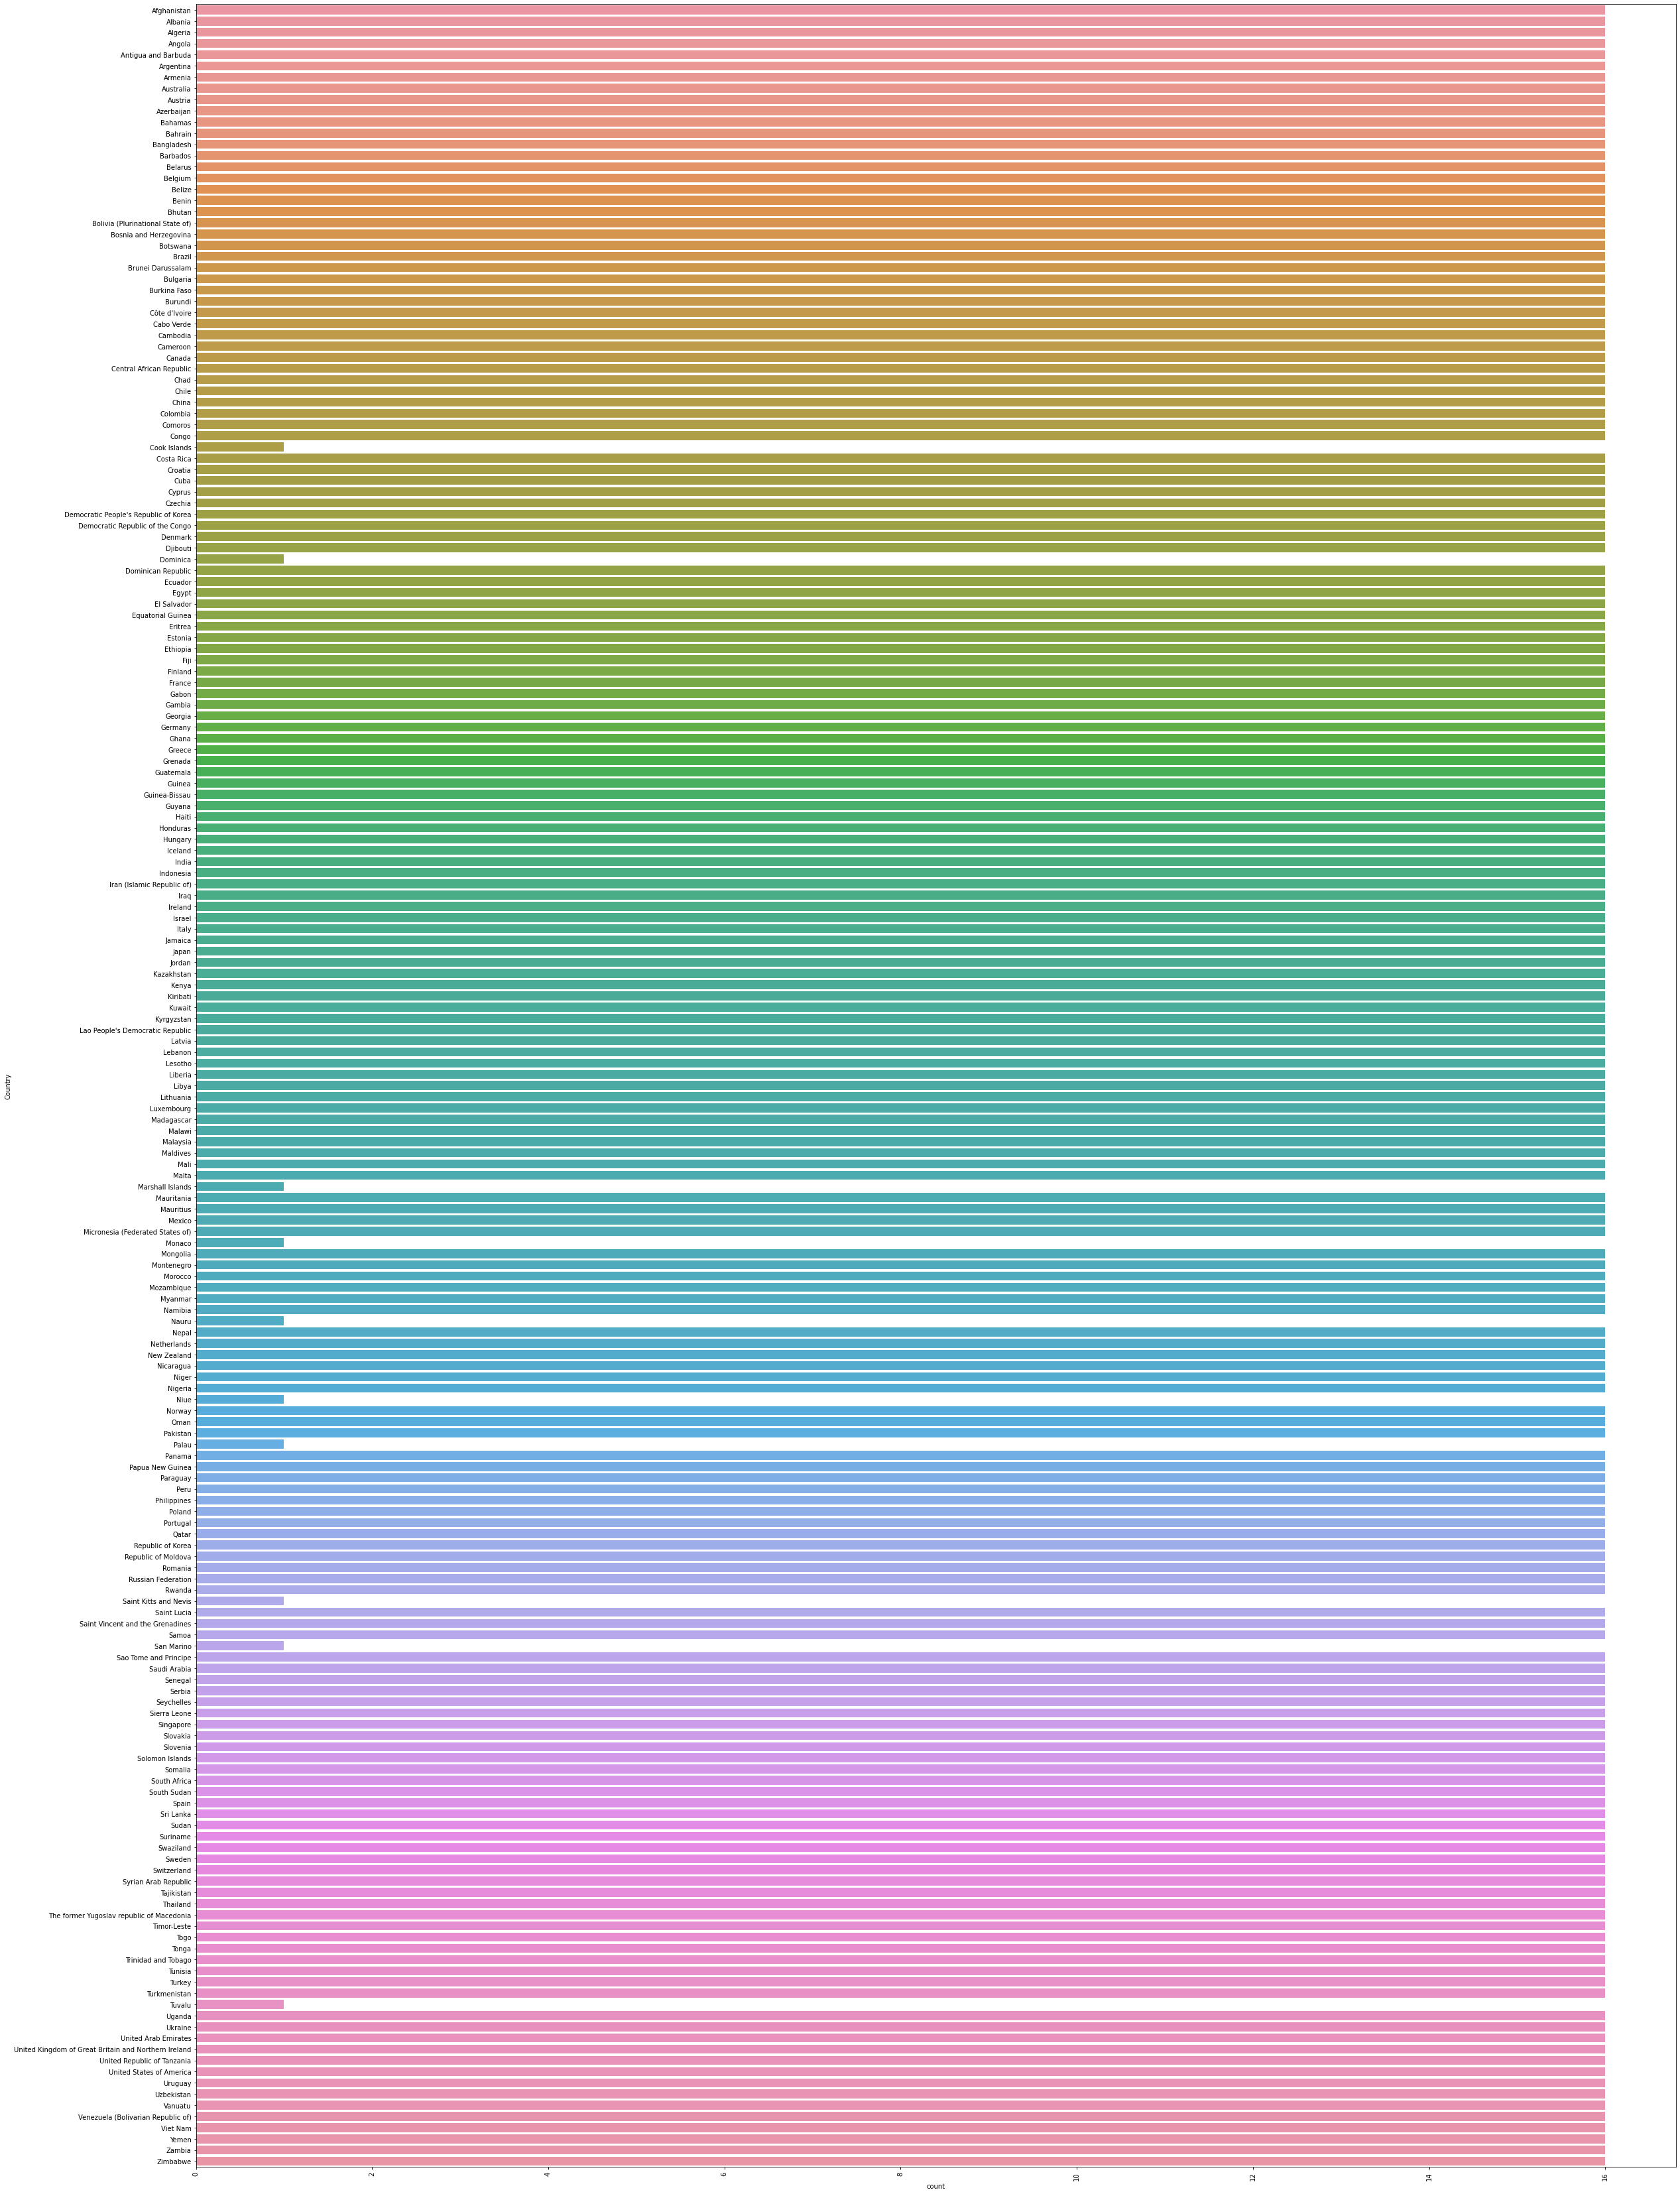

In [13]:
plt.figure(figsize=(40,60))
sns.countplot(data=df,y="Country")
plt.xticks(rotation=90)
plt.rc('ytick', labelsize=25)
plt.show()

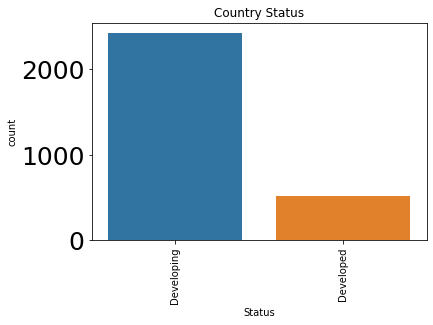

In [14]:
sns.countplot(data=df,x="Status")
plt.title("Country Status")
plt.xticks(rotation=90)
plt.show()

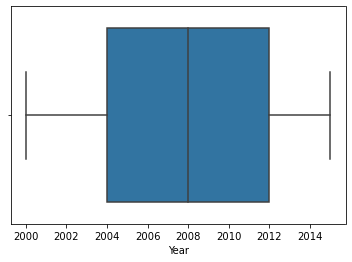

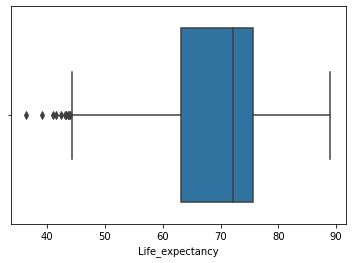

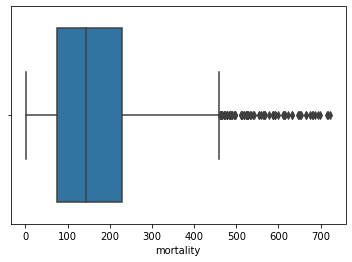

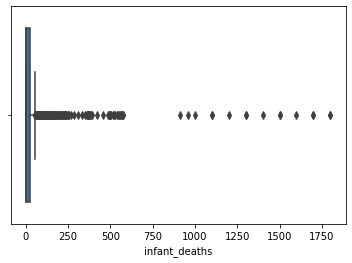

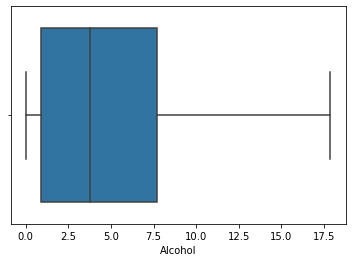

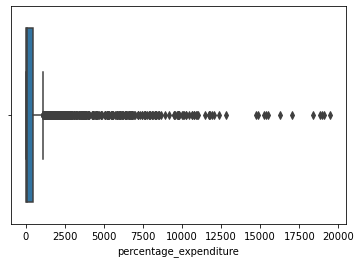

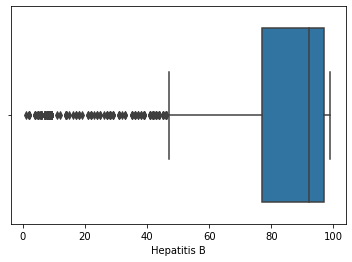

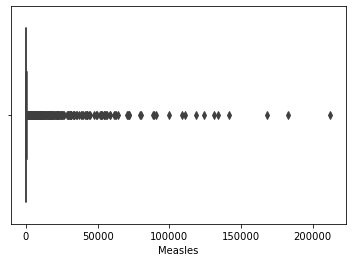

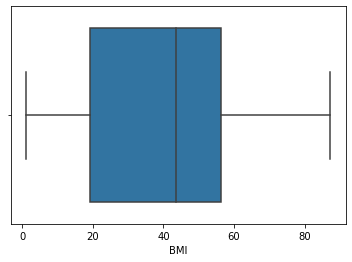

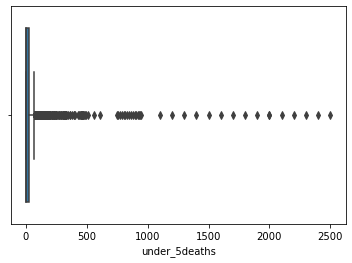

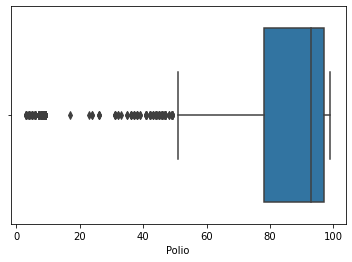

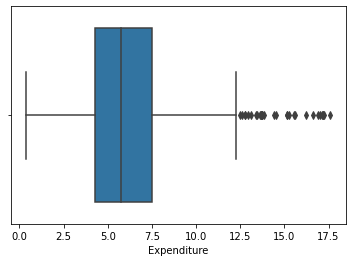

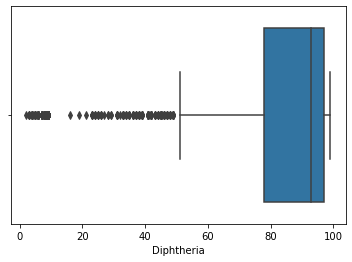

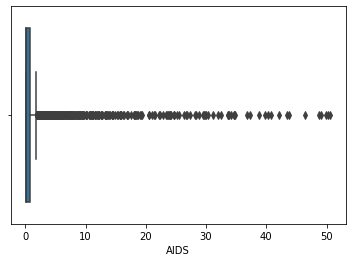

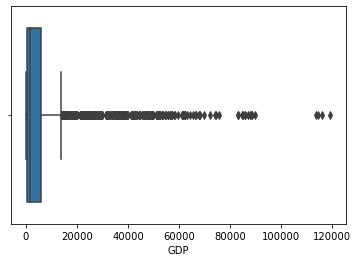

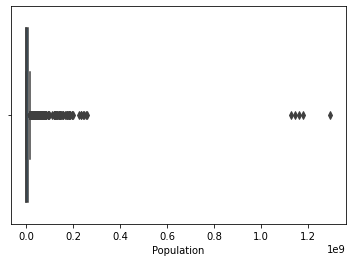

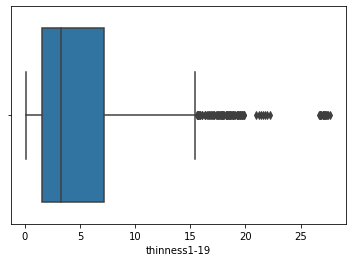

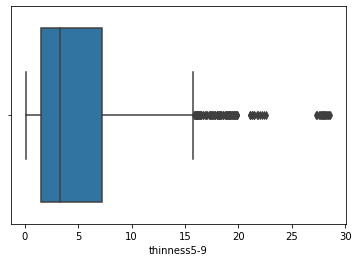

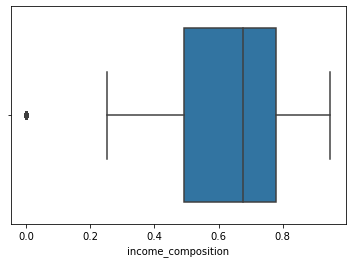

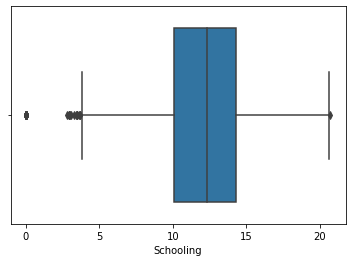

In [15]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

In [16]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under_5deaths', 'Polio', 'Expenditure', 'Diphtheria',
       'AIDS', 'GDP', 'Population', 'thinness1-19', 'thinness5-9',
       'income_composition', 'Schooling'],
      dtype='object')

## Outlier Correction 

In [17]:
colsForOutliers=['Life_expectancy', 'mortality',
       'infant_deaths', 'percentage_expenditure', 'Hepatitis B',
       'Measles', 'under_5deaths', 'Polio', 'Expenditure', 'Diphtheria',
       'AIDS', 'GDP', 'Population', 'thinness1-19', 'thinness5-9',
       'income_composition', 'Schooling']

In [18]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.50,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.008000e+03,2.015000e+03,2.015000e+03,2.015000e+03,2.015000e+03,2.015000e+03,2.015000e+03
Life_expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,45.600000,47.262000,48.481000,49.800000,51.400000,7.210000e+01,8.200000e+01,8.230000e+01,8.300000e+01,8.400000e+01,8.673000e+01,8.900000e+01
mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,4.270000,7.000000,11.000000,12.000000,13.000000,1.440000e+02,3.983000e+02,4.280000e+02,4.521900e+02,4.928400e+02,5.838400e+02,7.230000e+02
infant_deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,9.415000e+01,1.316000e+02,1.868900e+02,2.465200e+02,4.950400e+02,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,3.755000e+00,1.196000e+01,1.220000e+01,1.248840e+01,1.311420e+01,1.348140e+01,1.787000e+01
percentage_expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.491291e+01,4.506638e+03,5.485375e+03,6.569217e+03,7.989476e+03,1.019941e+04,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,6.000000,7.000000,8.000000,9.000000,9.000000,9.200000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000e+01,9.985550e+03,1.274264e+04,1.834331e+04,3.061846e+04,5.416336e+04,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,2.300000,2.700000,3.309000,4.400000,5.200000,4.350000e+01,6.478500e+01,6.550000e+01,6.640000e+01,6.800000e+01,7.209700e+01,8.730000e+01
under_5deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,1.380000e+02,1.776400e+02,2.554500e+02,3.466800e+02,7.678200e+02,2.500000e+03


In [19]:
def outliers_treatment(x):
    x=x.clip(upper=x.quantile(0.85))
    x=x.clip(lower=x.quantile(0.11))
    return x

In [20]:
df[colsForOutliers]=df[colsForOutliers].apply(outliers_treatment)

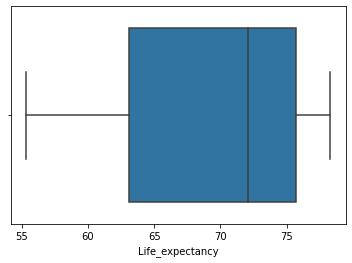

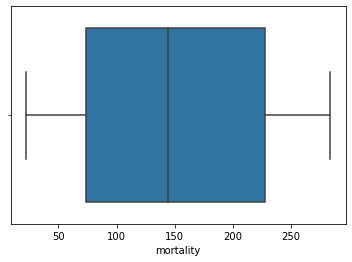

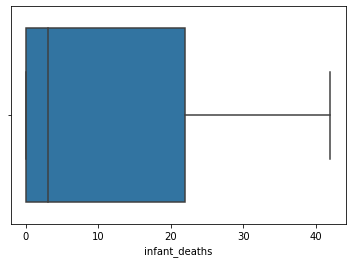

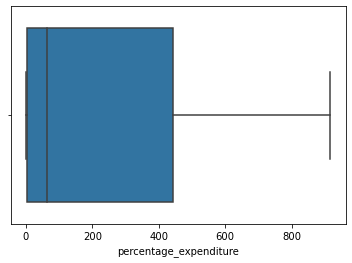

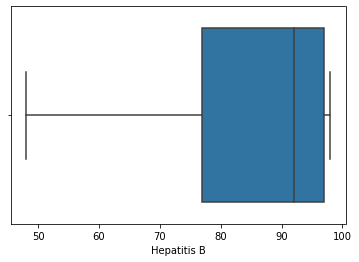

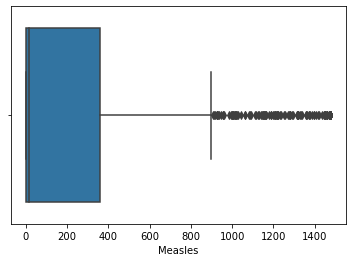

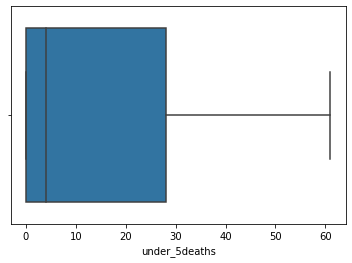

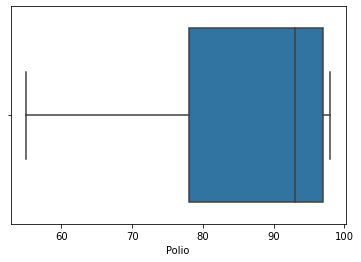

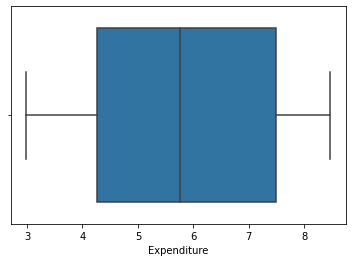

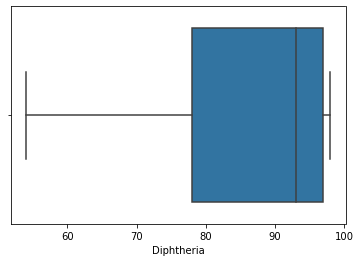

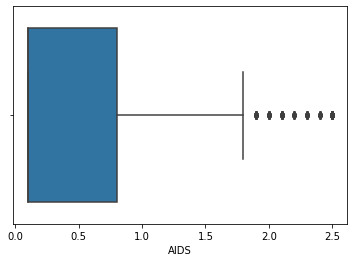

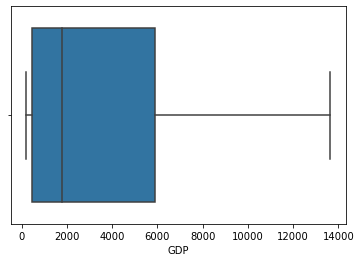

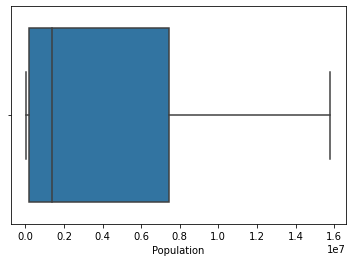

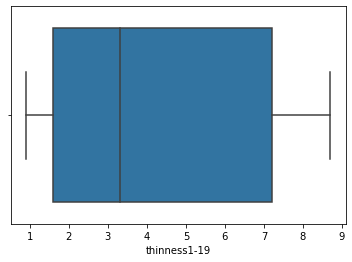

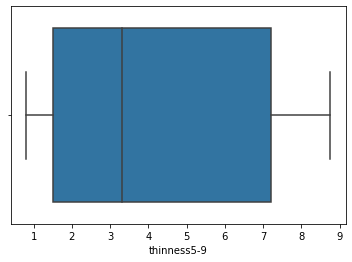

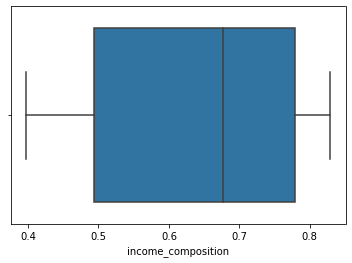

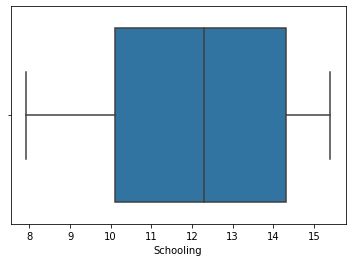

In [21]:
for i in colsForOutliers:
    sns.boxplot(x=df[i])
    plt.show()

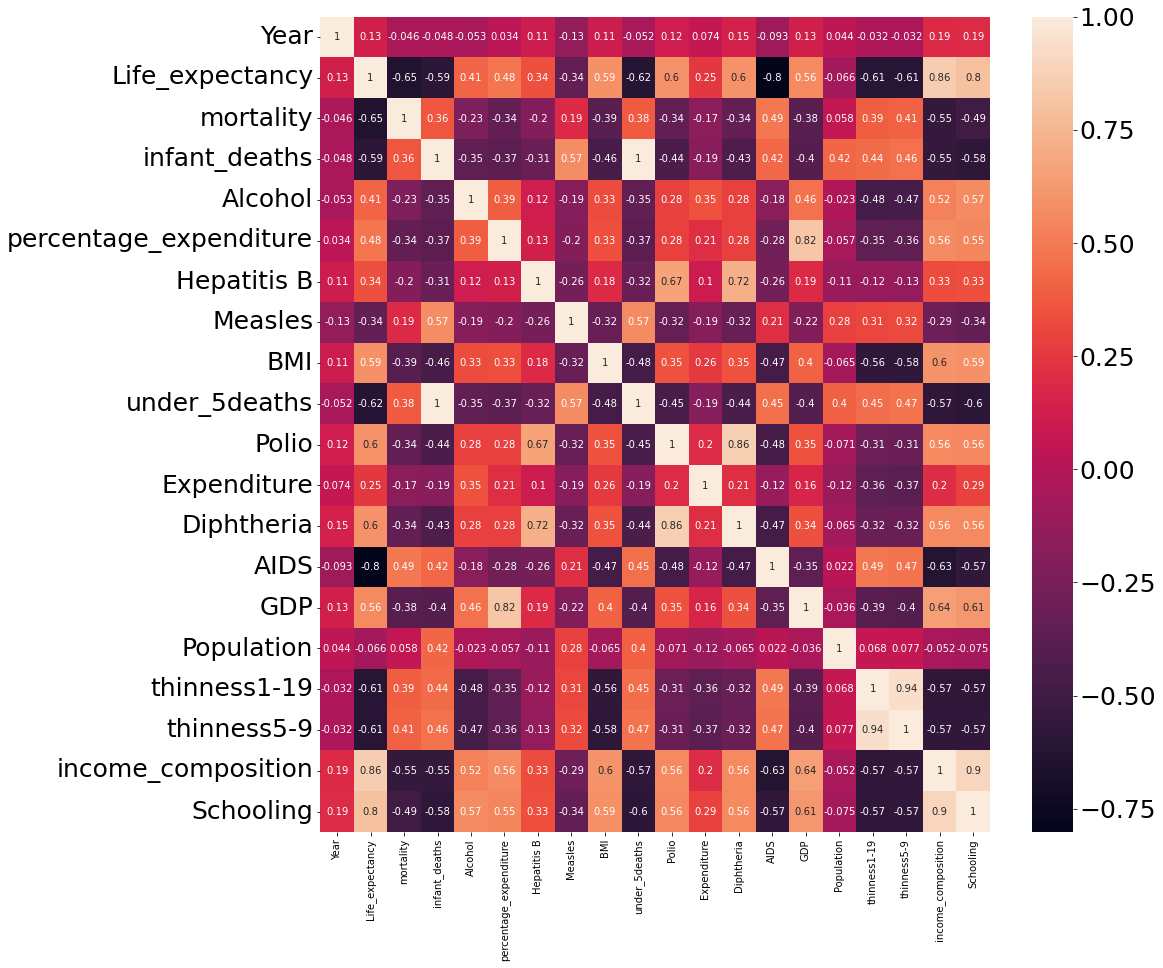

In [22]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.rc('ytick', labelsize=15)
plt.show()

## Dropping columns with less correlation with Life Expectancy

In [23]:
df.drop(columns=["Year","Country","Hepatitis B","Measles","Expenditure","Schooling","thinness5-9"],inplace=True)

In [24]:
df.columns

Index(['Status', 'Life_expectancy', 'mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'BMI', 'under_5deaths', 'Polio', 'Diphtheria',
       'AIDS', 'GDP', 'Population', 'thinness1-19', 'income_composition'],
      dtype='object')

In [25]:
df.dtypes

Status                     object
Life_expectancy           float64
mortality                 float64
infant_deaths             float64
Alcohol                   float64
percentage_expenditure    float64
BMI                       float64
under_5deaths             float64
Polio                     float64
Diphtheria                float64
AIDS                      float64
GDP                       float64
Population                float64
thinness1-19              float64
income_composition        float64
dtype: object

## Missing Value Imputation with Median

In [27]:
df['Life_expectancy'].fillna(df['Life_expectancy'].median(),inplace=True)
df['mortality'].fillna(df['mortality'].median(),inplace=True)
df['Alcohol'].fillna(df['Alcohol'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['Diphtheria'].fillna(df['Diphtheria'].median(),inplace=True)
df['GDP'].fillna(df['GDP'].median(),inplace=True)
df['Population'].fillna(df['Population'].median(),inplace=True)
df['thinness1-19'].fillna(df['thinness1-19'].median(),inplace=True)
df['income_composition'].fillna(df['income_composition'].median(),inplace=True)
df['Polio'].fillna(df['Polio'].median(),inplace=True)

In [28]:
df.isnull().sum()

Status                    0
Life_expectancy           0
mortality                 0
infant_deaths             0
Alcohol                   0
percentage_expenditure    0
BMI                       0
under_5deaths             0
Polio                     0
Diphtheria                0
AIDS                      0
GDP                       0
Population                0
thinness1-19              0
income_composition        0
dtype: int64

In [29]:
df.dtypes

Status                     object
Life_expectancy           float64
mortality                 float64
infant_deaths             float64
Alcohol                   float64
percentage_expenditure    float64
BMI                       float64
under_5deaths             float64
Polio                     float64
Diphtheria                float64
AIDS                      float64
GDP                       float64
Population                float64
thinness1-19              float64
income_composition        float64
dtype: object

## Label Encoding Status Column
* 1 is Developing
* 0 is Developed

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lb=LabelEncoder()
df["Status"]=lb.fit_transform(df["Status"])

In [32]:
df.head(10)

,Status,Life_expectancy,mortality,infant_deaths,Alcohol,percentage_expenditure,BMI,under_5deaths,Polio,Diphtheria,AIDS,GDP,Population,thinness1-19,income_composition
0,1,65.0,263.0,42.0,0.01,71.279624,19.1,61.0,55.0,65.0,0.1,584.259210,15795380.25,8.7,0.479
1,1,59.9,271.0,42.0,0.01,73.523582,18.6,61.0,58.0,62.0,0.1,612.696514,327582.00,8.7,0.476
2,1,59.9,268.0,42.0,0.01,73.219243,18.1,61.0,62.0,64.0,0.1,631.744976,15795380.25,8.7,0.470
3,1,59.5,272.0,42.0,0.01,78.184215,17.6,61.0,67.0,67.0,0.1,669.959000,3696958.00,8.7,0.463
4,1,59.2,275.0,42.0,0.01,7.097109,17.2,61.0,68.0,68.0,0.1,184.659472,2978599.00,8.7,0.454
5,1,58.8,279.0,42.0,0.01,79.679367,16.7,61.0,66.0,66.0,0.1,553.328940,2883167.00,8.7,0.448
6,1,58.6,281.0,42.0,0.01,56.762217,16.2,61.0,63.0,63.0,0.1,445.893298,284331.00,8.7,0.434
7,1,58.1,284.0,42.0,0.03,25.873925,15.7,61.0,64.0,64.0,0.1,373.361116,2729431.00,8.7,0.433
8,1,57.5,284.0,42.0,0.02,10.910156,15.2,61.0,63.0,63.0,0.1,369.835796,15795380.25,8.7,0.415
9,1,57.3,284.0,42.0,0.03,17.171518,14.7,61.0,58.0,58.0,0.1,272.563770,2589345.00,8.7,0.405


In [33]:
df.dtypes

Status                      int32
Life_expectancy           float64
mortality                 float64
infant_deaths             float64
Alcohol                   float64
percentage_expenditure    float64
BMI                       float64
under_5deaths             float64
Polio                     float64
Diphtheria                float64
AIDS                      float64
GDP                       float64
Population                float64
thinness1-19              float64
income_composition        float64
dtype: object

In [34]:
df["Status"].value_counts()

1    2426
0     512
Name: Status, dtype: int64

In [35]:
x=df.drop("Life_expectancy",axis=1)
y=df["Life_expectancy"]
print(x.shape)
print(y.shape)

(2938, 14)
(2938,)


## Splitting the data

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2203, 14)
(735, 14)
(2203,)
(735,)


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [39]:
# Model score - R2_Score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.8730054609671409
Testing Score 0.8772793066419786


In [40]:
ypred_m1 = m1.predict(x_test)

In [68]:
mean_absolute_percentage_error(ypred_m1,y_test)

0.03077502005546144

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
mae = mean_absolute_error(y_test,ypred_m1)
mse = mean_squared_error(y_test,ypred_m1)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m1))
r2s = r2_score(y_test,ypred_m1)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',m1.score(x_test,y_test))

MAE 2.053284308305555
MSE 7.762337337954101
RMSE 2.7860971515641912
R2_score 0.8772793066419786
Model_Score 0.8772793066419786


## OLS Model 

In [43]:
import statsmodels.api as sm

In [44]:
x1 = x_train
y1 = y_train

x1 = sm.add_constant(x1)

m2 = sm.OLS(y1,x1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1074.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:34:41   Log-Likelihood:                -5384.4
No. Observations:                2203   AIC:                         1.080e+04
Df Residuals:                    2188   BIC:                         1.088e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     60.8544      0.683     89.162      0.000      59.516      62.193
Status                    -0.7830      0.209     -3.740      0.000      -1.194      -0.372
mortality                 -0.0145      0.001    -17.249      0.000      -0.016      -0.013
infant_deaths              0.2851      0.044      6.452      0.000       0.198       0.372
Alcohol                    0.0165      0.021      0.791      0.429      -0.024       0.057
percentage_expenditure     0.0011      0.000      3.571      0.000       0.001       0.002
BMI                        0.0015      0.004      0.376      0.707      -0.006       0.009
under_5deaths             -0.2456      0.031     -7.919      0.000      -0.306      -0.185
Polio                      0.0143      0.008      1.697      0.090      -0.002       0.031
Diphtheria                 0.0386      0.008      4.699      0.000       0.022       0.055
AIDS                      -3.1488      0.095    -33.002      0.000      -3.336      -2.962
GDP                    -1.506e-05    2.5e-05     -0.602      0.547   -6.41e-05     3.4e-05
Population              3.132e-08   1.25e-08      2.514      0.012    6.89e-09    5.58e-08
thinness1-19              -0.1988      0.029     -6.855      0.000      -0.256      -0.142
income_composition        15.2436      0.724     21.067      0.000      13.825      16.663
==============================================================================
Omnibus:                       66.942   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.202
Skew:                          -0.018   Prob(JB):                     6.67e-38
Kurtosis:                       4.365   Cond. No.                     9.62e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Decision Tree

In [84]:
from sklearn import tree
from sklearn.tree import export_text

In [113]:
m2=DecisionTreeRegressor(min_samples_split=15,max_depth=7)
m2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=15)

In [114]:
print("Training Score",m2.score(x_train,y_train))
print("Testing Score",m2.score(x_test,y_test))

Training Score 0.9535868423776303
Testing Score 0.9148303918572087


In [115]:
Test_Pred = m2.predict(x_test)

In [ ]:
# def MAPE(Y_actual,Y_Predicted):
#     mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
#     return mape

In [65]:
from sklearn.metrics import mean_absolute_percentage_error

In [67]:
mean_absolute_percentage_error(Test_Pred,y_test)

0.02055248510006842

## Random Forest 

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
m3=RandomForestRegressor(n_estimators=70,max_depth=5,min_samples_split=15)
m3.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=15, n_estimators=70)

In [104]:
Test_Pred3 = m3.predict(x_test)

In [105]:
print("Training Score",m3.score(x_train,y_train))
print("Testing Score",m3.score(x_test,y_test))

Training Score 0.9417620000662635
Testing Score 0.9355128630605811


In [106]:
mean_absolute_percentage_error(Test_Pred3,y_test)

0.020551063314599674

## Applying StandardScaler

### RandomForest

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [119]:
m4=RandomForestRegressor(n_estimators=70,max_depth=5,min_samples_split=15)
m4.fit(x_train_sc,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=15, n_estimators=70)

In [120]:
Test_Pred4 = m4.predict(x_test_sc)

In [122]:
print("Training Score",m4.score(x_train_sc,y_train))
print("Testing Score",m4.score(x_test_sc,y_test))

Training Score 0.9422160646426023
Testing Score 0.9362381951250669


In [123]:
mean_absolute_percentage_error(Test_Pred4,y_test)

0.020499664099972857

### Decision Tree

In [139]:
m5=DecisionTreeRegressor(min_samples_split=15,max_depth=7)
m5.fit(x_train_sc,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=15)

In [140]:
Test_Pred5 = m5.predict(x_test_sc)

In [141]:
print("Training Score",m5.score(x_train_sc,y_train))
print("Testing Score",m5.score(x_test_sc,y_test))

Training Score 0.9535868423776303
Testing Score 0.9146712657539839
